In [1]:
import missingno as msno
import pandas as pd
import numpy as np
import scipy.interpolate as ip
from scipy.interpolate import splrep, splev
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df1 = pd.read_csv('ASOS_dangjin.csv',encoding='cp949')
df2 = pd.read_csv('ASOS_dangjin_from_2018.csv',encoding='cp949')
df3 = pd.read_csv('ASOS_ulsan.csv',encoding='cp949')
df4 = pd.read_csv('dangjin_floating_energy.csv',encoding='cp949')

df2
df22 = df2

c:\users\minisong\appdata\local\programs\python\python37\lib\site-packages\IPython\core\interactiveshell.py:3146: DtypeWarning: Columns (17) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
def drop_columns(df):
    df.drop(columns=df.columns[[0, 14, 16, 17, 18, 20, 21]], inplace = True)

drop_columns(df2)

In [4]:
발전량 = pd.read_csv('en.csv')

In [5]:
발전량[발전량['time'] == '2018-01-01 01:00:00']

,time,dangjin_floating,dangjin_warehouse,dangjin,ulsan
26304,2018-01-01 01:00:00,0.0,0.0,0.0,0.0


In [6]:
발전량[발전량['time'] == '2020-12-31 23:00:00']

,time,dangjin_floating,dangjin_warehouse,dangjin,ulsan
52606,2020-12-31 23:00:00,0.0,0.0,0.0,0.0


In [7]:
발전량spp=발전량.iloc[26304:52606]
발전량spp = 발전량spp.reset_index()

In [8]:
def 발전량추가(df):
    df['ulsan'] = 발전량spp['ulsan']
    df['dangjin_floating'] = 발전량spp['dangjin_floating']
    df['dangjin_warehouse'] = 발전량spp['dangjin_warehouse']
    df['dangjin'] = 발전량spp['dangjin']

In [9]:
발전량추가(df2)

In [10]:
def Spline(df,parameter):
    

    x_inter = pd.Series(df[parameter].interpolate(method='spline',order=3))
    df[parameter]= x_inter                    
    
    #return df[df2[parameter].isnull()]

In [11]:
def Snow_rain_0(df):
    df['적설(cm)'] = df['적설(cm)'].fillna(0)
    df['강수량(mm)'] = df['강수량(mm)'].fillna(0)

In [12]:
def 일조일사(df):
    df['일조(hr)'] = df['일조(hr)'].fillna(0)
    df['일사(MJ/m2)'] = df['일사(MJ/m2)'].fillna(0)

c:\users\minisong\appdata\local\programs\python\python37\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
c:\users\minisong\appdata\local\programs\python\python37\lib\site-packages\matplotlib\backends\backend_agg.py:183: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


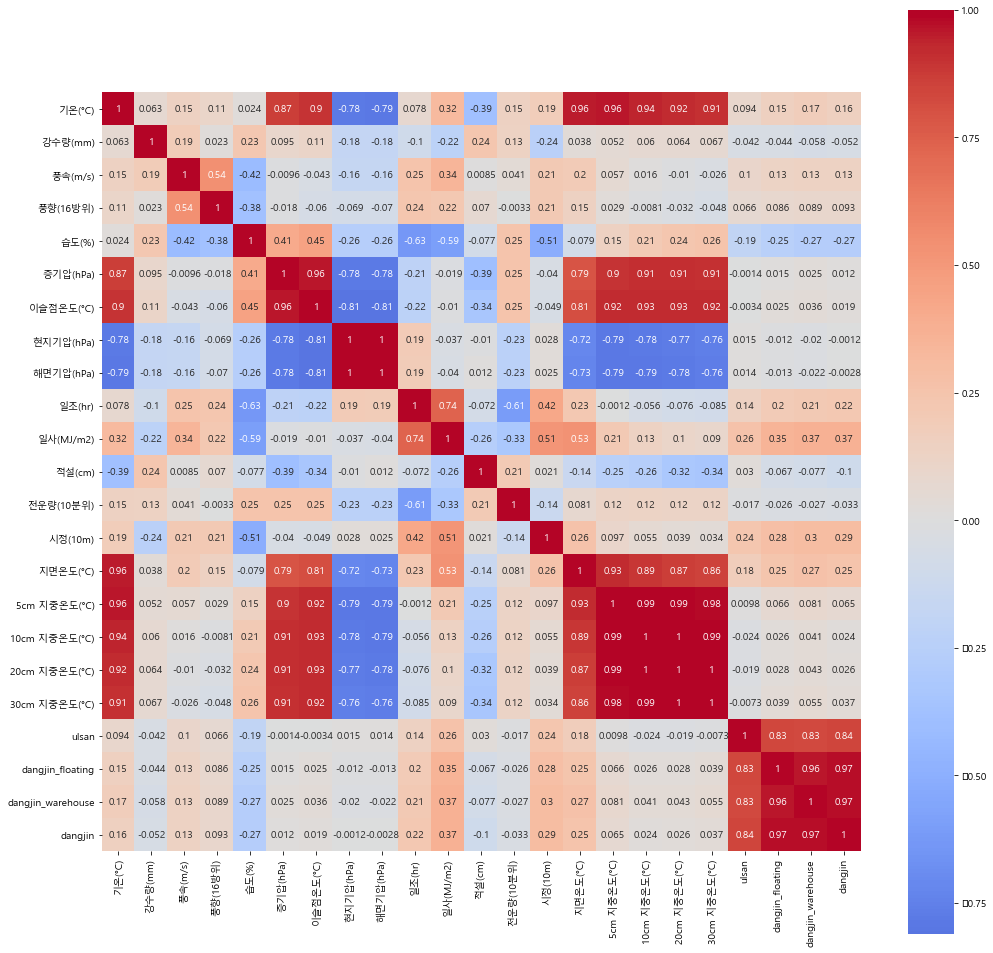

In [13]:
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.figure(figsize=(17, 17))
correlations = df2.corr(method='pearson')
sns.heatmap(correlations, cmap="coolwarm", square=True, center=0, annot=True)

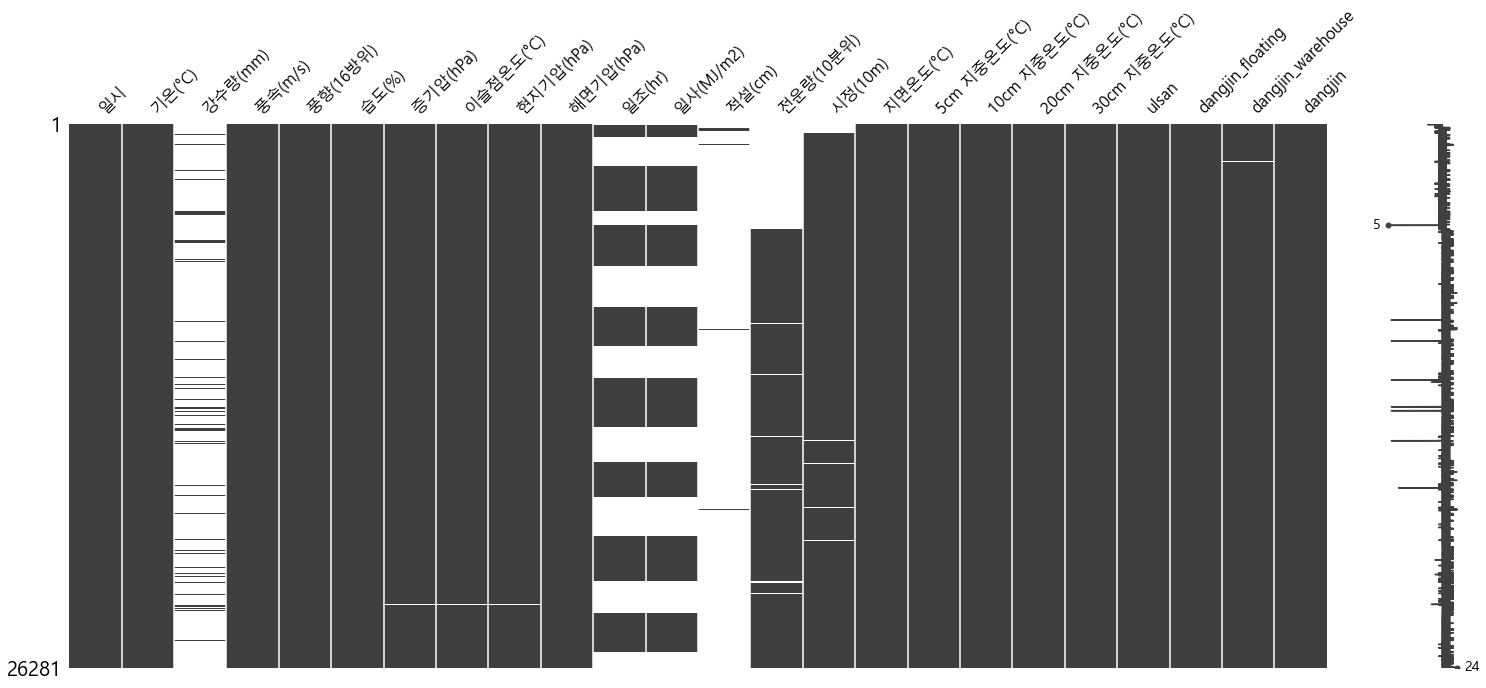

In [14]:
plt.rcParams['font.family'] = 'Malgun Gothic'
msno.matrix(df2)
plt.show()

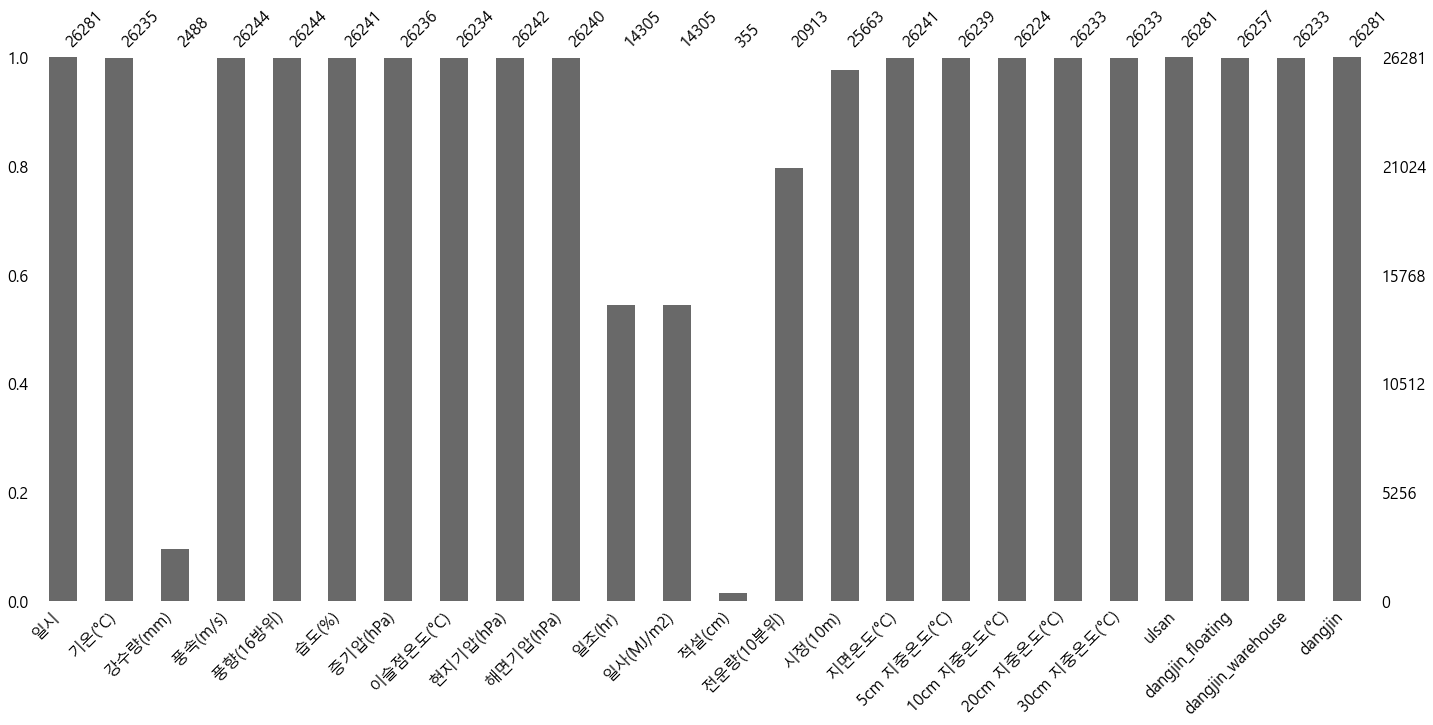

In [15]:
msno.bar(df2)
plt.show()

In [16]:
Snow_rain_0(df2)

In [17]:
일조일사(df2)

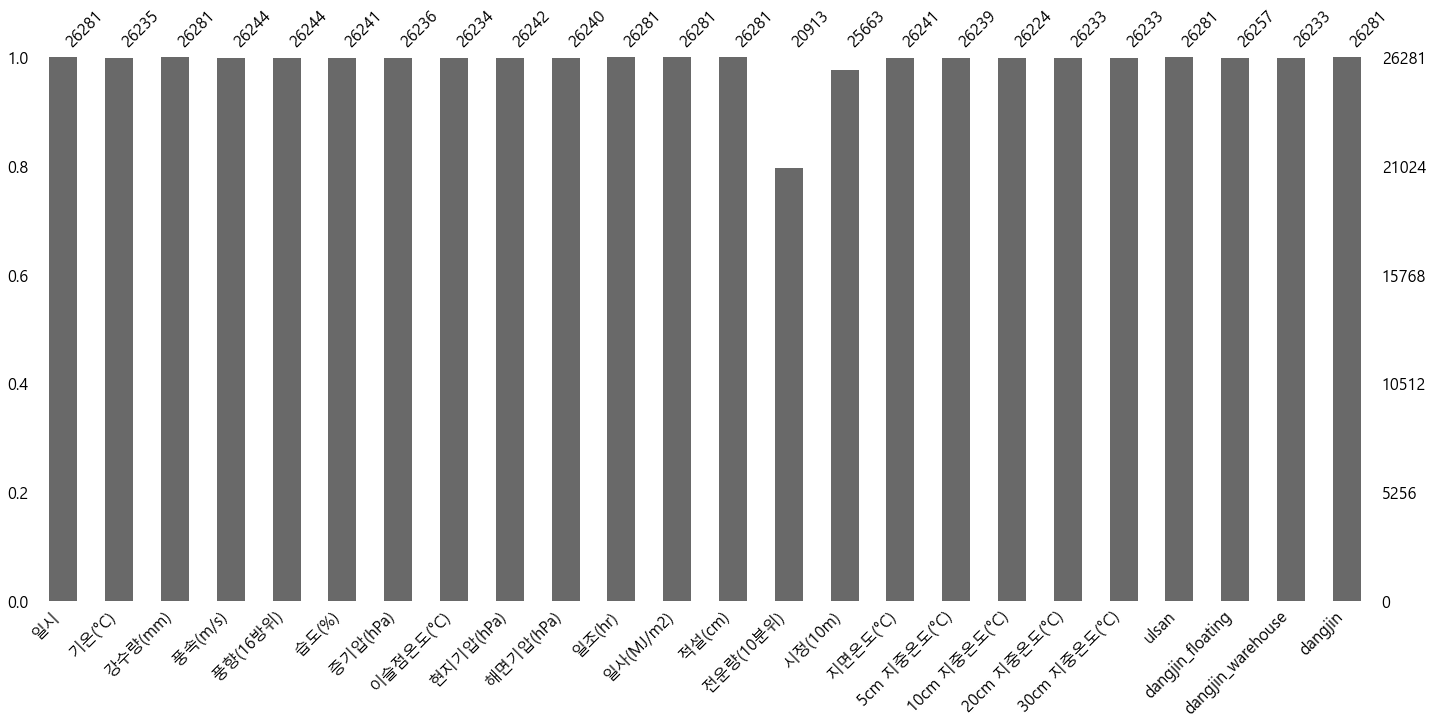

In [18]:
msno.bar(df2)
plt.show()

In [19]:
Spline(df2,'해면기압(hPa)')

In [20]:
Spline(df2,'풍속(m/s)')

In [21]:
#Spline(df2,'풍향(16방위)') #방위 스플라인 보간 에바인것 같은데
df2['풍향(16방위)']

0         70.0
1         90.0
2          0.0
3          0.0
4         20.0
         ...  
26276     70.0
26277    230.0
26278    230.0
26279    180.0
26280      0.0
Name: 풍향(16방위), Length: 26281, dtype: float64

In [22]:
Spline(df2,'습도(%)')

In [23]:
Spline(df2,'기온(°C)')

In [24]:
Spline(df2,'증기압(hPa)')

In [25]:
Spline(df2,'이슬점온도(°C)')

In [26]:
Spline(df2,'현지기압(hPa)')

In [27]:
Spline(df2,'시정(10m)')

In [28]:
Spline(df2,'지면온도(°C)')

In [29]:
Spline(df2,'10cm 지중온도(°C)')

In [30]:
Spline(df2,'ulsan')

In [31]:
Spline(df2,'dangjin_floating')

In [32]:
Spline(df2,'dangjin_warehouse')

In [33]:
Spline(df2,'dangjin')

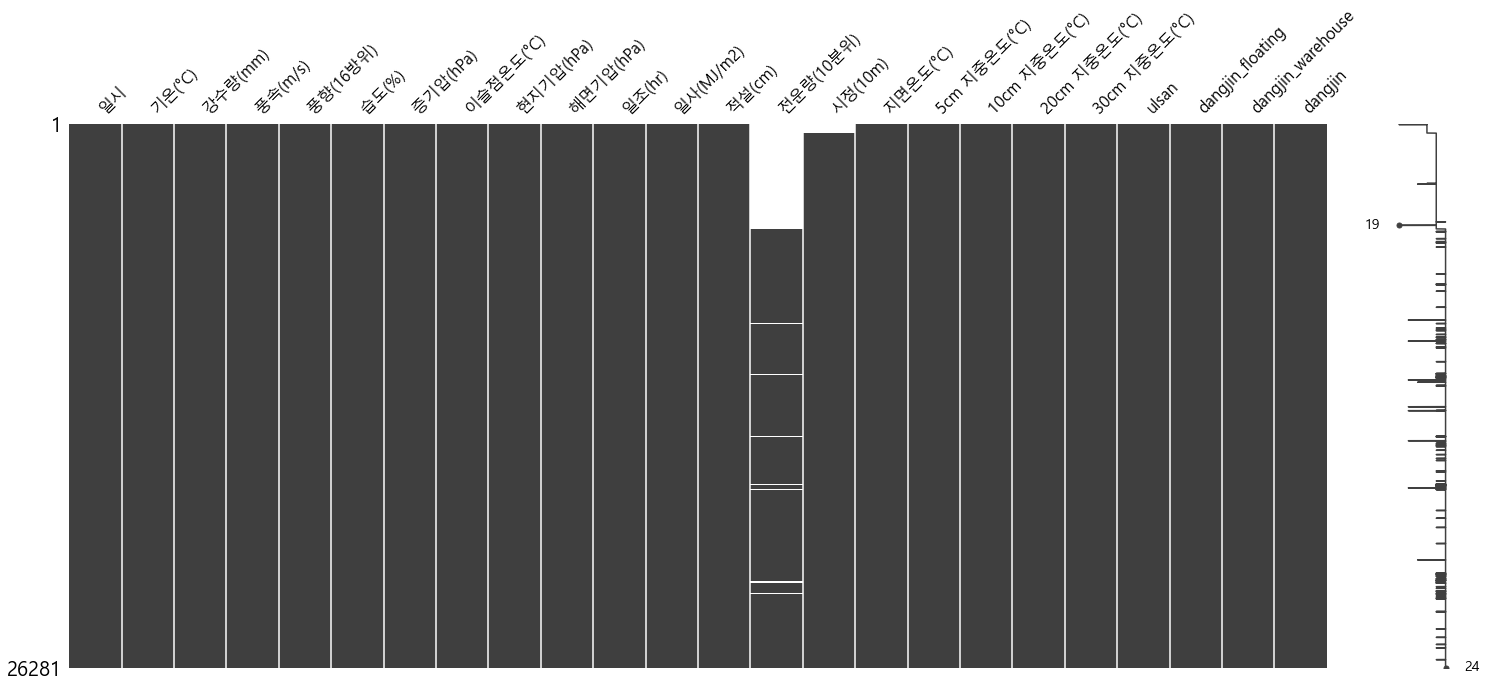

In [34]:
plt.rcParams['font.family'] = 'Malgun Gothic'
msno.matrix(df2)
plt.show()

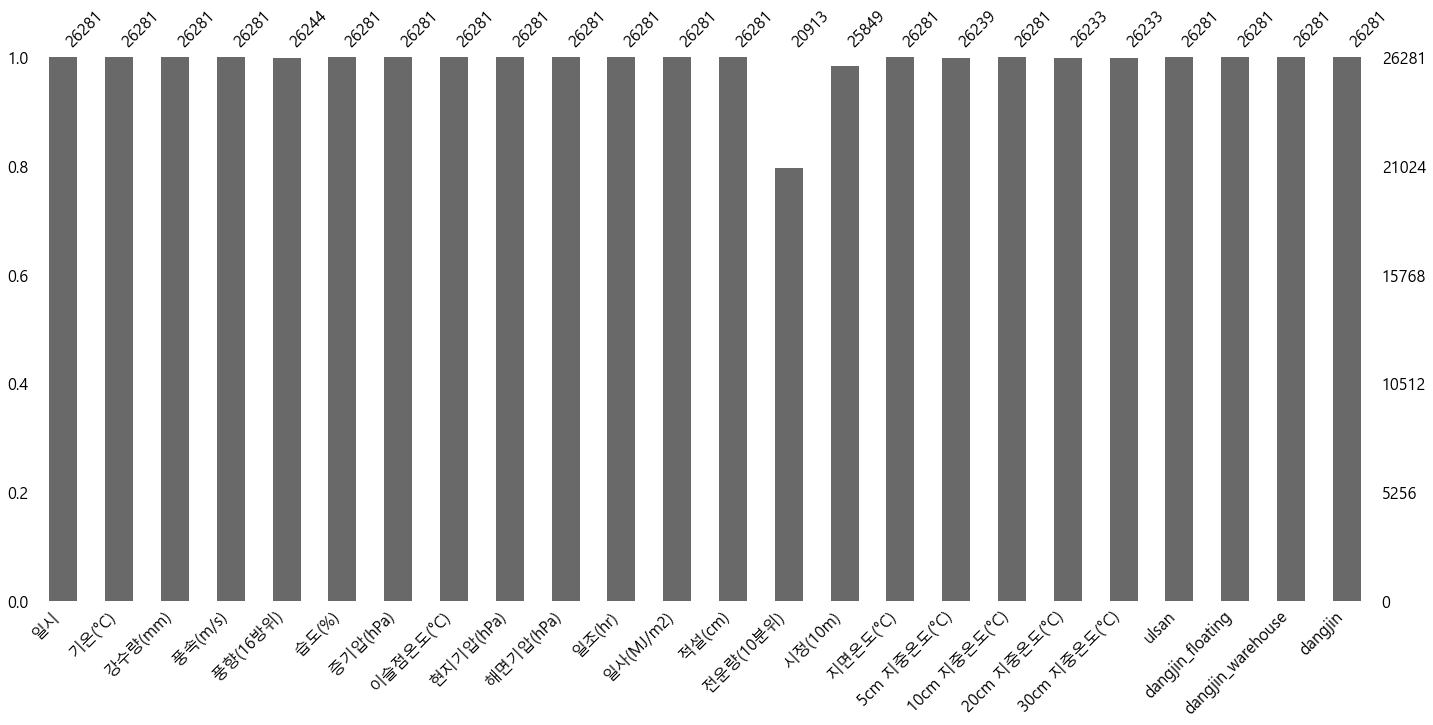

In [35]:
msno.bar(df2)
plt.show()

In [36]:
df2.columns

Index(['일시', '기온(°C)', '강수량(mm)', '풍속(m/s)', '풍향(16방위)', '습도(%)', '증기압(hPa)',
       '이슬점온도(°C)', '현지기압(hPa)', '해면기압(hPa)', '일조(hr)', '일사(MJ/m2)', '적설(cm)',
       '전운량(10분위)', '시정(10m)', '지면온도(°C)', '5cm 지중온도(°C)', '10cm 지중온도(°C)',
       '20cm 지중온도(°C)', '30cm 지중온도(°C)', 'ulsan', 'dangjin_floating',
       'dangjin_warehouse', 'dangjin'],
      dtype='object')

In [37]:
df_nom = df2

In [38]:
df_nom.to_csv('./정규화하기전.csv',index=False)

In [39]:
df_nom.drop(columns='일시',inplace=True)

In [40]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df_nom[ : ] = scaler.fit_transform(df_nom[ : ])

In [41]:
df_nom['일시'] = df22['일시']

KeyError: '일시'

In [ ]:
df_nom.to_csv('./정규화.csv',index=False)

In [ ]:
df_nom